In [1]:
%matplotlib inline
import pandas as pd
import nivapy3 as nivapy
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use("ggplot")

In [2]:
# Read RESA stations
stn_df = pd.read_csv(f"./tidied/resa2_stations.csv")

# List of station IDs for major Skagerrak rivers in RID (hovedelver and bielver)
stn_list = [29614, 29853, 29818, 29846, 29613, 29615, 29612, 36225, 29617, 29830]
stn_df = stn_df.query("station_id in @stn_list")

stn_df

,station_id,station_code,station_name,lake_or_river,latitude,longitude,altitude,catchment_area
12932,29614,VAGEOTR,Otra,R,58.184772,7.958165,NaN,3738.00
13170,29818,AAGENID,Nidelva (Rykene),R,58.400992,8.641999,NaN,4020.00
13182,29846,TELETOK,Tokkeelva,R,58.875994,9.353998,NaN,1200.00
13186,29853,VAGETOV,Tovdalselva,R,58.215997,8.116998,NaN,1854.00
15565,29613,TELESKI,Skienselva,R,59.204106,9.608039,NaN,10772.00
15580,36225,OSLEALN,Alna,R,59.905091,10.791359,NaN,68.96
15951,29612,BUSEDRA,Drammenselva,R,59.752576,10.007898,NaN,17034.00
16065,29830,ØSTETIS,Tista utløp Femsjøen,R,59.126617,11.445791,NaN,1582.00
16215,29615,VESENUM,Numedalslågen,R,59.101283,10.070949,NaN,5577.00
16818,29617,ØSTEGLO,Glomma ved Sarpsfoss,R,59.279802,11.134111,NaN,41918.00


In [4]:
nivapy.spatial.quickmap(stn_df, popup="station_code")

In [5]:
# Read chem
df = pd.read_csv(f"./tidied/resa2_water_chemistry.csv", low_memory=False)
df.head()

,value_id,sample_id,station_id,sample_date,depth1,depth2,parameter_name,flag,value,unit,method_description
0,1207441,423,183,1997-11-04,0.0,0.0,Al/Il,NaN,89.000,µg/l,"Aluminium, ikke-labilt, autoanalysator"
1,1207440,423,183,1997-11-04,0.0,0.0,Al/R,NaN,293.000,µg/l,"Aluminium, reaktivt, autoanalysator"
2,1207430,423,183,1997-11-04,0.0,0.0,ALK,NaN,0.014,mmol/l,"Alkalitet, potensiometrisk titrering pH 4.5"
3,1207436,423,183,1997-11-04,0.0,0.0,Ca,NaN,0.900,mg/l,"Kalsium i renvann, ionekomatografi"
4,1207434,423,183,1997-11-04,0.0,0.0,Cl,NaN,6.100,mg/l,"Klorid, ionekromatografi"


In [6]:
# Identify par name for silicate
par_list = sorted(df["parameter_name"].unique())
[i for i in par_list if i.startswith("S")]

['S',
 'SO4',
 'SO4_Old',
 'SPM',
 'STS',
 'Sb',
 'Se',
 'SiO2',
 'Siktedyp',
 'Sm',
 'Sn',
 'Sr']

In [7]:
# Get SiO2 data for stations of interest
df = df.query("(station_id in @stn_list) and (parameter_name == 'SiO2')")
df.head()

,value_id,sample_id,station_id,sample_date,depth1,depth2,parameter_name,flag,value,unit,method_description
2034445,4179150,359792,29613,2000-09-26,0.0,0.0,SiO2,NaN,2.357143,mg SiO2/l,NaN
2034466,4179251,359793,29613,2000-11-30,0.0,0.0,SiO2,NaN,3.214286,mg SiO2/l,NaN
2034488,4179086,359794,29613,2000-10-31,0.0,0.0,SiO2,NaN,3.214286,mg SiO2/l,NaN
2034510,4179301,359795,29613,2000-03-30,0.0,0.0,SiO2,NaN,2.785714,mg SiO2/l,NaN
2034532,4179132,359796,29613,2000-08-30,0.0,0.0,SiO2,NaN,2.142857,mg SiO2/l,NaN


In [8]:
# Long-term means
df.groupby(["station_id"]).mean()["value"]

station_id
29612    2.779402
29613    2.084271
29614    1.558368
29615    3.355152
29617    3.751457
29818    2.138138
29830    3.479493
29846    2.798980
29853    1.862916
36225    6.930134
Name: value, dtype: float64

In [9]:
# Time series plots
df = df.groupby(["station_id", "sample_date"]).mean()["value"].reset_index()
df["sample_date"] = pd.to_datetime(df["sample_date"], format="%Y-%m-%d")
df.rename({"value": "Silicate (mg SiO2/l)"}, inplace=True, axis=1)
df.head()

,station_id,sample_date,Silicate (mg SiO2/l)
0,29612,1995-02-13,2.4
1,29612,1995-03-16,2.3
2,29612,1995-04-13,2.8
3,29612,1995-05-08,2.7
4,29612,1995-06-06,2.8


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


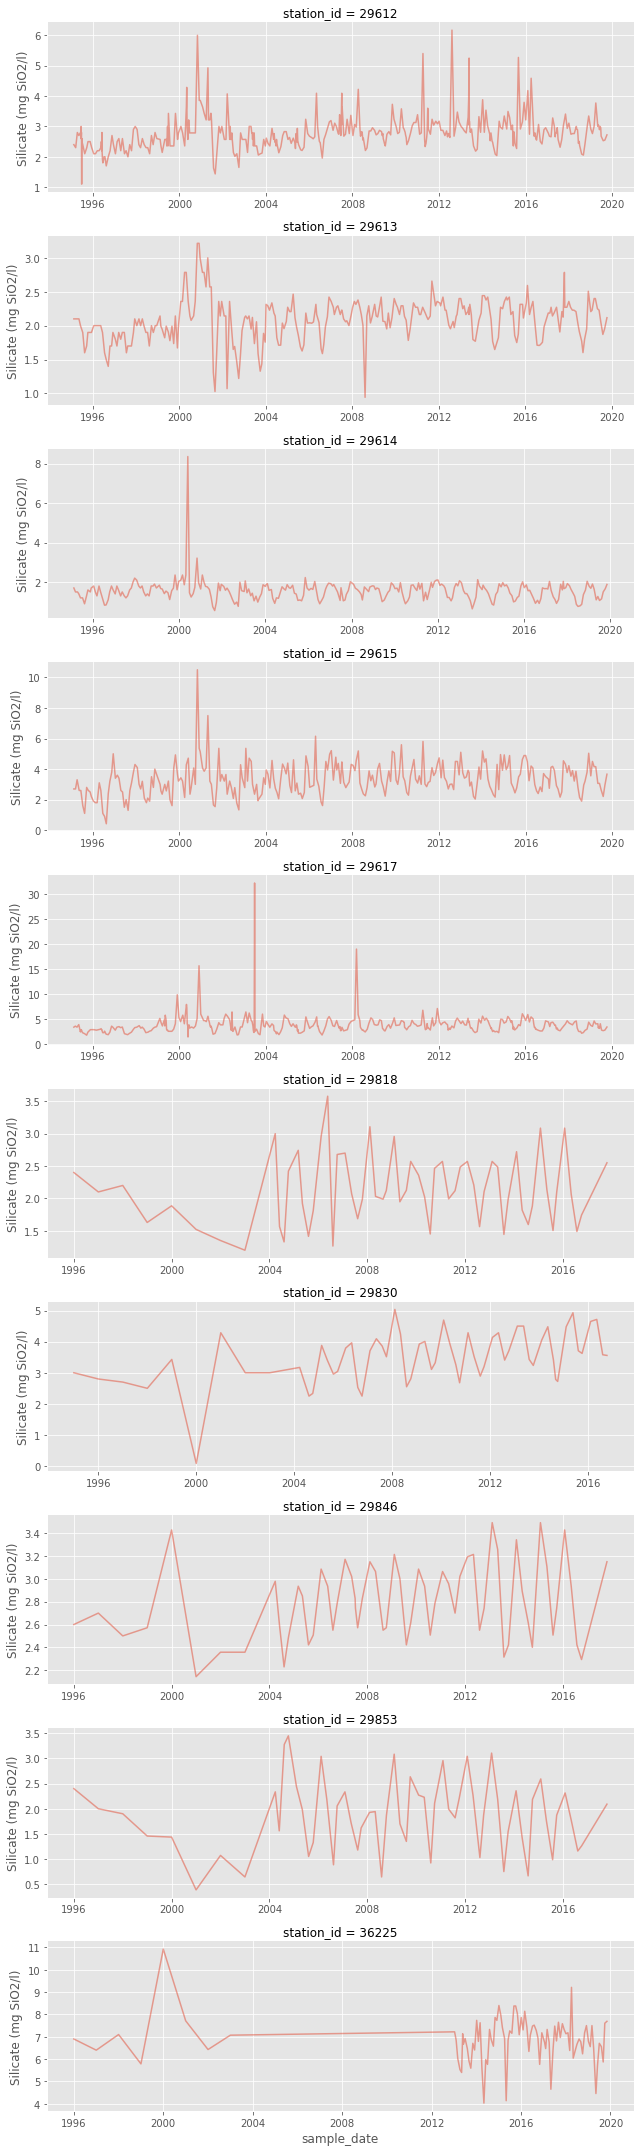

In [11]:
sn.relplot(
    data=df,
    x="sample_date",
    y="Silicate (mg SiO2/l)",
    row="station_id",
    height=3,
    aspect=3,
    kind="line",
    legend=False,
    alpha=0.5,
    facet_kws={"sharey": False, "sharex": False},
)